# 1. Object Creation (객체 생성)


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
s = pd.Series([1,3,5,np.nan, 6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

datetime 인덱스와 레이블이 있는 열을 가지고 있는 numpy 배열을 전달하여 데이터프레임을 만듭니다.

In [7]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [8]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,-0.342426,-0.851732,1.347389,-0.812204
2013-01-02,-3.143569,-0.354926,0.006140,1.394260
2013-01-03,0.417865,-0.202697,-1.131247,-0.275793
2013-01-04,0.295284,0.917545,0.918773,1.900139
2013-01-05,0.776590,0.096479,-1.093643,-0.452882
2013-01-06,-0.418649,0.843096,1.005303,-1.007763


Series와 같은 것으로 변환될 수 있는 객체들의 dict로 구성된 데이터프레임을 만듭니다.

In [9]:
df2 = pd.DataFrame({'A' : 1.,
                    'B' : pd.Timestamp('20130102'),
                    'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                    'D' : np.array([3] * 4,dtype='int32'),
                    'E' : pd.Categorical(["test","train","test","train"]),
                    'F' : 'foo' })
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


데이터프레임 결과물의 열은 다양한 데이터 타입 (dtypes)으로 구성됩니다.

In [10]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

# 2. Viewing Data (데이터 확인하기)
Basic Section을 참조하세요.

데이터프레임의 가장 윗 줄과 마지막 줄을 확인하고 싶을 때에 사용하는 방법은 다음과 같습니다.

역자 주: 괄호() 안에는 숫자가 들어갈 수도 있고 안 들어갈 수도 있습니다. 숫자가 들어간다면, 윗 / 마지막 줄의 특정 줄을 불러올 수 있습니다. 숫자가 들어가지 않다면, 기본값인 5로 처리됩니다.

예시

In [11]:
df.tail(3)  # 끝에서 마지막 3줄을 불러옴
df.tail()  # 끝에서 마지막 5줄 불러옴
df.head()

,A,B,C,D
2013-01-01,-0.342426,-0.851732,1.347389,-0.812204
2013-01-02,-3.143569,-0.354926,0.006140,1.394260
2013-01-03,0.417865,-0.202697,-1.131247,-0.275793
2013-01-04,0.295284,0.917545,0.918773,1.900139
2013-01-05,0.776590,0.096479,-1.093643,-0.452882


In [12]:
df.tail(3)

,A,B,C,D
2013-01-04,0.295284,0.917545,0.918773,1.900139
2013-01-05,0.776590,0.096479,-1.093643,-0.452882
2013-01-06,-0.418649,0.843096,1.005303,-1.007763


인덱스 (index), 열 (column) 그리고 numpy 데이터에 대한 세부 정보를 봅니다.

In [13]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [14]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [15]:
df.values

array([[-0.34242608, -0.85173236,  1.34738899, -0.8122038 ],
       [-3.14356852, -0.35492605,  0.00614012,  1.39426024],
       [ 0.41786511, -0.20269699, -1.13124697, -0.27579275],
       [ 0.29528412,  0.91754506,  0.91877276,  1.90013908],
       [ 0.77658994,  0.09647861, -1.09364304, -0.45288244],
       [-0.41864935,  0.84309572,  1.0053032 , -1.00776347]])

describe()는 데이터의 대략적인 통계적 정보 요약을 보여줍니다.

In [16]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.402484,0.074627,0.175453,0.124293
std,1.418977,0.695859,1.091911,1.218050
min,-3.143569,-0.851732,-1.131247,-1.007763
25%,-0.399594,-0.316869,-0.818697,-0.722373
50%,-0.023571,-0.053109,0.462456,-0.364338
75%,0.387220,0.656441,0.983671,0.976747
max,0.776590,0.917545,1.347389,1.900139


데이터를 전치합니다.

In [17]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-0.342426,-3.143569,0.417865,0.295284,0.776590,-0.418649
B,-0.851732,-0.354926,-0.202697,0.917545,0.096479,0.843096
C,1.347389,0.006140,-1.131247,0.918773,-1.093643,1.005303
D,-0.812204,1.394260,-0.275793,1.900139,-0.452882,-1.007763


축 별로 정렬합니다.

In [18]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-0.812204,1.347389,-0.851732,-0.342426
2013-01-02,1.394260,0.006140,-0.354926,-3.143569
2013-01-03,-0.275793,-1.131247,-0.202697,0.417865
2013-01-04,1.900139,0.918773,0.917545,0.295284
2013-01-05,-0.452882,-1.093643,0.096479,0.776590
2013-01-06,-1.007763,1.005303,0.843096,-0.418649


값 별로 정렬합니다.

In [19]:
df.sort_values(by='B')

,A,B,C,D
2013-01-01,-0.342426,-0.851732,1.347389,-0.812204
2013-01-02,-3.143569,-0.354926,0.006140,1.394260
2013-01-03,0.417865,-0.202697,-1.131247,-0.275793
2013-01-05,0.776590,0.096479,-1.093643,-0.452882
2013-01-06,-0.418649,0.843096,1.005303,-1.007763
2013-01-04,0.295284,0.917545,0.918773,1.900139


# 3. Selection (선택)
주석 (Note) : 선택과 설정을 위한 Python / Numpy의 표준화된 표현들이 직관적이며, 코드 작성을 위한 양방향 작업에 유용하지만 우리는 Pandas에 최적화된 데이터 접근 방법인 .at, .iat, .loc 및 .iloc 을 추천합니다.

데이터 인덱싱 및 선택 문서와 다중 인덱싱 / 심화 인덱싱 문서를 참조하세요.

Getting (데이터 얻기)  

df.A 와 동일한 Series를 생성하는 단일 열을 선택합니다.

In [24]:
df['A']

2013-01-01   -0.342426
2013-01-02   -3.143569
2013-01-03    0.417865
2013-01-04    0.295284
2013-01-05    0.776590
2013-01-06   -0.418649
Freq: D, Name: A, dtype: float64

행을 분할하는 [ ]를 통해 선택합니다.

In [23]:
df[0:3]


,A,B,C,D
2013-01-01,-0.342426,-0.851732,1.347389,-0.812204
2013-01-02,-3.143569,-0.354926,0.006140,1.394260
2013-01-03,0.417865,-0.202697,-1.131247,-0.275793


In [ ]:
df['20130102':'20130104']

Selection by Label (Label 을 통한 선택)
Label을 통한 선택에서 더 많은 내용을 확인하세요.

라벨을 사용하여 횡단면을 얻습니다.

In [22]:
df.loc[dates[0]]

A   -0.342426
B   -0.851732
C    1.347389
D   -0.812204
Name: 2013-01-01 00:00:00, dtype: float64

라벨을 사용하여 여러 축 (의 데이터)을 얻습니다.

In [21]:
df.loc[:,['A','B']]

,A,B
2013-01-01,-0.342426,-0.851732
2013-01-02,-3.143569,-0.354926
2013-01-03,0.417865,-0.202697
2013-01-04,0.295284,0.917545
2013-01-05,0.776590,0.096479
2013-01-06,-0.418649,0.843096


양쪽 종단점을 포함한 라벨 슬라이싱을 봅니다.

In [25]:
df.loc['20130102':'20130104', ['A','B']]

,A,B
2013-01-02,-3.143569,-0.354926
2013-01-03,0.417865,-0.202697
2013-01-04,0.295284,0.917545


반환되는 객체의 차원를 줄입니다.

In [26]:
df.loc['20130102',['A','B']]

A   -3.143569
B   -0.354926
Name: 2013-01-02 00:00:00, dtype: float64

스칼라 값을 얻습니다.

In [27]:
df.loc[dates[0],'A']

-0.34242608061560564

스칼라 값을 더 빠르게 구하는 방법입니다 (앞선 메소드와 동일합니다).

In [28]:
df.at[dates[0],'A']

-0.34242608061560564

Selection by Position (위치로 선택하기)
자세한 내용은 위치로 선택하기를 참고해주세요.

넘겨받은 정수의 위치를 기준으로 선택합니다.

In [30]:
df.iloc[3]

A    0.295284
B    0.917545
C    0.918773
D    1.900139
Name: 2013-01-04 00:00:00, dtype: float64

정수로 표기된 슬라이스들을 통해, numpy / python과 유사하게 작동합니다.

In [31]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,0.295284,0.917545
2013-01-05,0.776590,0.096479


정수로 표기된 위치값의 리스트들을 통해, numpy / python의 스타일과 유사해집니다.

In [32]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,-3.143569,0.006140
2013-01-03,0.417865,-1.131247
2013-01-05,0.776590,-1.093643


명시적으로 행을 나누고자 하는 경우입니다.

In [33]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,-3.143569,-0.354926,0.006140,1.394260
2013-01-03,0.417865,-0.202697,-1.131247,-0.275793


명시적으로 열을 나누고자 하는 경우입니다.

In [34]:
df.iloc[:,1:3]

,B,C
2013-01-01,-0.851732,1.347389
2013-01-02,-0.354926,0.006140
2013-01-03,-0.202697,-1.131247
2013-01-04,0.917545,0.918773
2013-01-05,0.096479,-1.093643
2013-01-06,0.843096,1.005303


명시적으로 (특정한) 값을 얻고자 하는 경우입니다.

In [36]:
df.iloc[1,1]

-0.3549260501568448

스칼라 값을 빠르게 얻는 방법입니다 (위의 방식과 동일합니다)

In [37]:
df.iat[1,1]

-0.3549260501568448

Boolean Indexing  
데이터를 선택하기 위해 단일 열의 값을 사용합니다.

In [41]:
df[df.A > 0]

,A,B,C,D
2013-01-03,0.417865,-0.202697,-1.131247,-0.275793
2013-01-04,0.295284,0.917545,0.918773,1.900139
2013-01-05,0.776590,0.096479,-1.093643,-0.452882


Boolean 조건을 충족하는 데이터프레임에서 값을 선택합니다.

In [39]:
df[df>0]

,A,B,C,D
2013-01-01,NaN,NaN,1.347389,NaN
2013-01-02,NaN,NaN,0.006140,1.394260
2013-01-03,0.417865,NaN,NaN,NaN
2013-01-04,0.295284,0.917545,0.918773,1.900139
2013-01-05,0.776590,0.096479,NaN,NaN
2013-01-06,NaN,0.843096,1.005303,NaN


필터링을 위한 메소드 isin()을 사용합니다.

In [43]:
df2 = df.copy()
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df2

,A,B,C,D,E
2013-01-01,-0.342426,-0.851732,1.347389,-0.812204,one
2013-01-02,-3.143569,-0.354926,0.006140,1.394260,one
2013-01-03,0.417865,-0.202697,-1.131247,-0.275793,two
2013-01-04,0.295284,0.917545,0.918773,1.900139,three
2013-01-05,0.776590,0.096479,-1.093643,-0.452882,four
2013-01-06,-0.418649,0.843096,1.005303,-1.007763,three


In [44]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,0.417865,-0.202697,-1.131247,-0.275793,two
2013-01-05,0.776590,0.096479,-1.093643,-0.452882,four


Setting (설정)  
새 열을 설정하면 데이터가 인덱스 별로 자동 정렬됩니다.

In [45]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [48]:
df['F'] = s1

라벨에 의해 값을 설정합니다.

In [49]:
df.at[dates[0],'A'] = 0

위치에 의해 값을 설정합니다.

In [50]:
df.iat[0,1] = 0

Numpy 배열을 사용한 할당에 의해 값을 설정합니다.

In [51]:
df.loc[:,'D'] = np.array([5] * len(df))

위 설정대로 작동한 결과입니다.

In [52]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,1.347389,5,NaN
2013-01-02,-3.143569,-0.354926,0.006140,5,1.0
2013-01-03,0.417865,-0.202697,-1.131247,5,2.0
2013-01-04,0.295284,0.917545,0.918773,5,3.0
2013-01-05,0.776590,0.096479,-1.093643,5,4.0
2013-01-06,-0.418649,0.843096,1.005303,5,5.0


where 연산을 설정합니다.

In [53]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.347389,-5,NaN
2013-01-02,-3.143569,-0.354926,-0.006140,-5,-1.0
2013-01-03,-0.417865,-0.202697,-1.131247,-5,-2.0
2013-01-04,-0.295284,-0.917545,-0.918773,-5,-3.0
2013-01-05,-0.776590,-0.096479,-1.093643,-5,-4.0
2013-01-06,-0.418649,-0.843096,-1.005303,-5,-5.0


# 4. Missing Data (결측치)
Pandas는 결측치를 표현하기 위해 주로 np.nan 값을 사용합니다. 이 방법은 기본 설정값이지만 계산에는 포함되지 않습니다. Missing data section을 참조하세요.

Reindexing으로 지정된 축 상의 인덱스를 변경 / 추가 / 삭제할 수 있습니다. Reindexing은 데이터의 복사본을 반환합니다.

In [54]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1],'E'] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,1.347389,5,NaN,1.0
2013-01-02,-3.143569,-0.354926,0.006140,5,1.0,1.0
2013-01-03,0.417865,-0.202697,-1.131247,5,2.0,NaN
2013-01-04,0.295284,0.917545,0.918773,5,3.0,NaN


결측치를 가지고 있는 행들을 지웁니다.

In [55]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,-3.143569,-0.354926,0.00614,5,1.0,1.0


결측치를 채워 넣습니다.

In [56]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,1.347389,5,5.0,1.0
2013-01-02,-3.143569,-0.354926,0.006140,5,1.0,1.0
2013-01-03,0.417865,-0.202697,-1.131247,5,2.0,5.0
2013-01-04,0.295284,0.917545,0.918773,5,3.0,5.0


nan인 값에 boolean을 통한 표식을 얻습니다.

역자 주 : 데이터프레임의 모든 값이 boolean 형태로 표시되도록 하며, nan인 값에만 True가 표시되게 하는 함수입니다.

In [58]:
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


# 5. Operation (연산)
이진 (Binary) 연산의 기본 섹션을 참조하세요.

Stats (통계)
일반적으로 결측치를 제외한 후 연산됩니다.

기술통계를 수행합니다.

In [59]:
df.mean()

A   -0.345413
B    0.216583
C    0.175453
D    5.000000
F    3.000000
dtype: float64

다른 축에서 동일한 연산을 수행합니다.

In [60]:
df.mean(1)

2013-01-01    1.586847
2013-01-02    0.501529
2013-01-03    1.216784
2013-01-04    2.026320
2013-01-05    1.755885
2013-01-06    2.285950
Freq: D, dtype: float64

정렬이 필요하며, 차원이 다른 객체로 연산해보겠습니다. 또한, pandas는 지정된 차원을 따라 자동으로 브로드 캐스팅됩니다.

역자 주 : broadcast란 numpy에서 유래한 용어로, n차원이나 스칼라 값으로 연산을 수행할 때 도출되는 결과의 규칙을 설명하는 것을 의미합니다.

In [62]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [63]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.582135,-1.202697,-2.131247,4.0,1.0
2013-01-04,-2.704716,-2.082455,-2.081227,2.0,0.0
2013-01-05,-4.223410,-4.903521,-6.093643,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


Apply (적용)
데이터에 함수를 적용합니다.

In [64]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,1.347389,5,NaN
2013-01-02,-3.143569,-0.354926,1.353529,10,1.0
2013-01-03,-2.725703,-0.557623,0.222282,15,3.0
2013-01-04,-2.430419,0.359922,1.141055,20,6.0
2013-01-05,-1.653829,0.456401,0.047412,25,10.0
2013-01-06,-2.072479,1.299496,1.052715,30,15.0


In [66]:
df.apply(lambda x: s.max() - x.min())

A    8.143569
B    5.354926
C    6.131247
D    0.000000
F    4.000000
dtype: float64

Histogramming (히스토그래밍)  
더 많은 내용은 Histogramming and Discretization (히스토그래밍과 이산화) 항목을 참조하세요.

In [69]:
s = pd.Series(np.random.randint(0, 7, size=10))
s 

0    6
1    1
2    6
3    5
4    5
5    4
6    2
7    0
8    2
9    3
dtype: int64

In [70]:
s.value_counts()

6    2
5    2
2    2
4    1
3    1
1    1
0    1
dtype: int64

String Methods (문자열 메소드)  
Series는 다음의 코드와 같이 문자열 처리 메소드 모음 (set)을 가지고 있습니다.
이 모음은 배열의 각 요소를 쉽게 조작할 수 있도록 만들어주는 문자열의 속성에 포함되어 있습니다.

문자열의 패턴 일치 확인은 기본적으로 정규 표현식을 사용하며, 몇몇 경우에는 항상 정규 표현식을 사용함에 유의하십시오.

좀 더 자세한 내용은 벡터화된 문자열 메소드 부분에서 확인할 수 있습니다.



In [71]:
s = pd.Series(['A','B','C','Aaba','Baca', np.nan, 'CABA', 'dog','cat'])
s.str.lower() 

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

# 6. Merge (병합)
Concat (연결)  
결합 (join) / 병합 (merge) 형태의 연산에 대한 인덱스, 관계 대수 기능을 위한 다양한 형태의 논리를 포함한 Series, 데이터프레임, Panel 객체를 손쉽게 결합할 수 있도록 하는 다양한 기능을 pandas 에서 제공합니다.

Merging 부분을 참조하세요.

concat()으로 pandas 객체를 연결합니다.

In [72]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,0.402320,-0.502348,-1.120909,0.531418
1,-0.855721,0.242418,1.189400,-1.388573
2,-0.282233,-1.751090,1.424547,0.554529
3,-0.816314,-0.048216,-1.394940,0.578824
4,-0.170962,-1.415575,0.336189,-0.330495
5,-0.661738,1.906218,-0.891326,0.313809
6,-0.717493,0.648549,0.338032,-1.211131
7,1.813300,-0.333821,0.042955,-0.575613
8,1.236864,-0.204039,-0.052692,-1.355003
9,-2.650502,1.683278,0.666948,0.861683


In [73]:
# break it into pieces
pieces = [df[:3], df[3:7], df[7:]]
pd.concat(pieces)

,0,1,2,3
0,0.402320,-0.502348,-1.120909,0.531418
1,-0.855721,0.242418,1.189400,-1.388573
2,-0.282233,-1.751090,1.424547,0.554529
3,-0.816314,-0.048216,-1.394940,0.578824
4,-0.170962,-1.415575,0.336189,-0.330495
5,-0.661738,1.906218,-0.891326,0.313809
6,-0.717493,0.648549,0.338032,-1.211131
7,1.813300,-0.333821,0.042955,-0.575613
8,1.236864,-0.204039,-0.052692,-1.355003
9,-2.650502,1.683278,0.666948,0.861683


Join (결합)  
SQL 방식으로 병합합니다. 데이터베이스 스타일 결합 부분을 참고하세요.

In [75]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
left

,key,lval
0,foo,1
1,foo,2


In [76]:
right

,key,rval
0,foo,4
1,foo,5


In [77]:
pd.merge(left, right, on= 'key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


다른 예시입니다.

In [81]:
left = pd.DataFrame({'key' : ['foo', 'bar'], 'lval' : [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
left

,key,lval
0,foo,1
1,bar,2


In [80]:
right

,key,rval
0,foo,4
1,bar,5


In [82]:
pd.merge(left, right, on= 'key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


Append (추가)  
데이터프레임에 행을 추가합니다. Appending 부분을 참조하세요.

In [83]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,-0.026381,1.344845,-0.010309,-0.467071
1,0.669459,0.536891,-1.615720,-0.503551
2,-0.151723,0.377362,-0.976358,-0.988580
3,0.717939,-0.266618,-0.260787,-0.370428
4,0.310249,-0.769332,0.510590,1.529899
5,1.474478,-2.017474,-0.997266,-0.098372
6,-0.517370,-0.137313,0.084351,0.731128
7,-2.659330,0.876823,1.462657,-0.984750


In [84]:
s = df.iloc[3]
df.append(s, ignore_index=True)

,A,B,C,D
0,-0.026381,1.344845,-0.010309,-0.467071
1,0.669459,0.536891,-1.615720,-0.503551
2,-0.151723,0.377362,-0.976358,-0.988580
3,0.717939,-0.266618,-0.260787,-0.370428
4,0.310249,-0.769332,0.510590,1.529899
5,1.474478,-2.017474,-0.997266,-0.098372
6,-0.517370,-0.137313,0.084351,0.731128
7,-2.659330,0.876823,1.462657,-0.984750
8,0.717939,-0.266618,-0.260787,-0.370428


# 7. Grouping (그룹화)
그룹화는 다음 단계 중 하나 이상을 포함하는 과정을 가리킵니다.

- 몇몇 기준에 따라 여러 그룹으로 데이터를 분할 (splitting)
- 각 그룹에 독립적으로 함수를 적용 (applying)
- 결과물들을 하나의 데이터 구조로 결합 (combining)

자세한 내용은 그룹화 부분을 참조하세요.

In [85]:
df = pd.DataFrame(
    {
        'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
        'B' : ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
        'C' : np.random.randn(8),
        'D' : np.random.randn(8)
    })
df

,A,B,C,D
0,foo,one,0.757761,-0.329771
1,bar,one,0.134394,-0.499278
2,foo,two,-0.491633,-0.379307
3,bar,three,-0.232925,-1.272925
4,foo,two,-0.834454,-0.496603
5,bar,two,0.712031,-0.627776
6,foo,one,1.418995,-0.184065
7,foo,three,1.073287,1.491440


생성된 데이터프레임을 그룹화한 후 각 그룹에 sum() 함수를 적용합니다.

In [86]:
df.groupby('A').sum()

,C,D
A,,
bar,0.613499,-2.399979
foo,1.923955,0.101694


여러 열을 기준으로 그룹화하면 계층적 인덱스가 형성됩니다. 여기에도 sum 함수를 적용할 수 있습니다.

In [87]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    0.134394 -0.499278
    three -0.232925 -1.272925
    two    0.712031 -0.627776
foo one    2.176755 -0.513836
    three  1.073287  1.491440
    two   -1.326087 -0.875910

# 8. Reshaping (변형)
계층적 인덱싱 및 변형 부분을 참조하세요.

Stack (스택)

In [88]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df2  =  df[:4]
df2

A         B
first second                    
bar   one     1.902021  1.335136
      two    -1.474330 -0.367302
baz   one    -0.573933 -1.145611
      two    -0.537419  1.109494

stack() 메소드는 데이터프레임 열들의 계층을 “압축”합니다.

In [89]:
stacked = df2.stack()
stacked

first  second   
bar    one     A    1.902021
               B    1.335136
       two     A   -1.474330
               B   -0.367302
baz    one     A   -0.573933
               B   -1.145611
       two     A   -0.537419
               B    1.109494
dtype: float64

“Stack된” 데이터프레임 또는 (MultiIndex를 인덱스로 사용하는) Series인 경우, stack()의 역 연산은 unstack()이며, 기본적으로 마지막 계층을 unstack합니다.

In [90]:
stacked.unstack()

A         B
first second                    
bar   one     1.902021  1.335136
      two    -1.474330 -0.367302
baz   one    -0.573933 -1.145611
      two    -0.537419  1.109494

In [91]:
stacked.unstack(1)

second        one       two
first                      
bar   A  1.902021 -1.474330
      B  1.335136 -0.367302
baz   A -0.573933 -0.537419
      B -1.145611  1.109494

In [93]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  1.902021 -0.573933
       B  1.335136 -1.145611
two    A -1.474330 -0.537419
       B -0.367302  1.109494

Pivot Tables (피봇 테이블)  
피봇 테이블 부분을 참조하세요.

In [95]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                   'B' : ['A', 'B', 'C'] * 4,
                   'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D' : np.random.randn(12),
                   'E' : np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,-0.850937,-0.931049
1,one,B,foo,-0.956143,-0.438282
2,two,C,foo,-0.401924,1.325861
3,three,A,bar,-0.095590,0.759515
4,one,B,bar,0.337512,1.609711
5,one,C,bar,-1.292205,-0.662226
6,two,A,foo,-0.547258,-0.101225
7,three,B,foo,-0.025714,0.556860
8,one,C,foo,0.947146,1.098133
9,one,A,bar,-1.464707,0.246461


이 데이터로부터 피봇 테이블을 매우 쉽게 생성할 수 있습니다.

In [96]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A -1.464707 -0.850937
      B  0.337512 -0.956143
      C -1.292205  0.947146
three A -0.095590       NaN
      B       NaN -0.025714
      C  0.204827       NaN
two   A       NaN -0.547258
      B -1.292049       NaN
      C       NaN -0.401924

# 9. Time Series (시계열)
Pandas는 자주 일어나는 변환 (예시 : 5분마다 일어나는 데이터에 대한 2차 데이터 변환) 사이에 수행하는 리샘플링 연산을 위한 간단하고, 강력하며, 효율적인 함수를 제공합니다. 이는 재무 (금융) 응용에서 매우 일반적이지만 이에 국한되지는 않습니다. 시계열 부분을 참고하세요.

In [97]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample('5Min').sum()

2012-01-01    27564
Freq: 5T, dtype: int64

시간대를 표현합니다.



In [98]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06   -1.430032
2012-03-07    0.412695
2012-03-08    1.493875
2012-03-09   -0.255322
2012-03-10   -1.025020
Freq: D, dtype: float64

In [100]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00   -1.430032
2012-03-07 00:00:00+00:00    0.412695
2012-03-08 00:00:00+00:00    1.493875
2012-03-09 00:00:00+00:00   -0.255322
2012-03-10 00:00:00+00:00   -1.025020
Freq: D, dtype: float64

다른 시간대로 변환합니다.

In [101]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00   -1.430032
2012-03-06 19:00:00-05:00    0.412695
2012-03-07 19:00:00-05:00    1.493875
2012-03-08 19:00:00-05:00   -0.255322
2012-03-09 19:00:00-05:00   -1.025020
Freq: D, dtype: float64

시간 표현 ↔ 기간 표현으로 변환합니다.

In [102]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31   -0.521700
2012-02-29    0.298633
2012-03-31   -0.410553
2012-04-30   -1.399807
2012-05-31   -0.261591
Freq: M, dtype: float64

In [103]:
ps = ts.to_period()
ps

2012-01   -0.521700
2012-02    0.298633
2012-03   -0.410553
2012-04   -1.399807
2012-05   -0.261591
Freq: M, dtype: float64

In [104]:
ps.to_timestamp()

2012-01-01   -0.521700
2012-02-01    0.298633
2012-03-01   -0.410553
2012-04-01   -1.399807
2012-05-01   -0.261591
Freq: MS, dtype: float64

기간 ↔ 시간 변환은 편리한 산술 기능들을 사용할 수 있도록 만들어줍니다. 다음 예제에서, 우리는 11월에 끝나는 연말 결산의 분기별 빈도를 분기말 익월의 월말일 오전 9시로 변환합니다.

In [105]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9
ts.head()

1990-03-01 09:00    1.633778
1990-06-01 09:00   -0.345685
1990-09-01 09:00   -1.582678
1990-12-01 09:00   -0.344406
1991-03-01 09:00   -1.937031
Freq: H, dtype: float64

# 10. Categoricals (범주화)
Pandas는 데이터프레임 내에 범주형 데이터를 포함할 수 있습니다. 범주형 소개 와 API 문서 부분을 참조하세요.

In [106]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})

가공하지 않은 성적을 범주형 데이터로 변환합니다.

In [107]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

범주에 더 의미 있는 이름을 붙여주세요 (Series.cat.categories로 할당하는 것이 적합합니다).

In [109]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

범주의 순서를 바꾸고 동시에 누락된 범주를 추가합니다 (Series.cat에 속하는 메소드는 기본적으로 새로운 Series를 반환합니다).

In [110]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

정렬은 사전 순서가 아닌, 해당 범주에서 지정된 순서대로 배열합니다.

역자 주 : 131번에서 very bad, bad, medium, good, very good 의 순서로 기재되어 있기 때문에 정렬 결과도 해당 순서대로 배열됩니다.

In [111]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


범주의 열을 기준으로 그룹화하면 빈 범주도 표시됩니다.

In [112]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

# 11. Plotting (그래프)
Plotting 부분을 참조하세요.

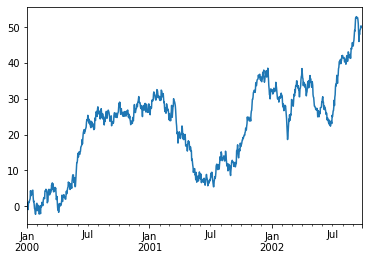

In [113]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

데이터프레임에서 plot() 메소드는 라벨이 존재하는 모든 열을 그릴 때 편리합니다.

<Figure size 432x288 with 0 Axes>

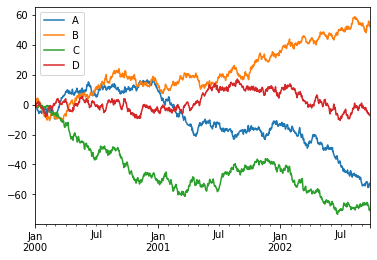

In [114]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])  
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')

# 12. Getting Data In / Out (데이터 입 / 출력)
CSV  
csv 파일에 씁니다.

In [115]:
df.to_csv('foo.csv')

csv 파일을 읽습니다.

In [116]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,-1.212165,-0.285510,1.023389,-1.419661
1,2000-01-02,-0.916641,1.254875,0.098798,-0.088572
2,2000-01-03,0.400174,1.449419,0.515578,-1.165640
3,2000-01-04,-0.205798,3.276769,-0.340469,-1.698480
4,2000-01-05,-0.670273,3.819593,-1.513482,1.057041
...,...,...,...,...,...
995,2002-09-22,-55.353338,55.956105,-67.610748,-6.639108
996,2002-09-23,-53.486397,55.300288,-69.621854,-6.550135
997,2002-09-24,-52.610339,53.151918,-70.621797,-6.340187
998,2002-09-25,-52.500415,52.233460,-69.925443,-6.521695


HDF5  
HDFStores에 읽고 씁니다.

HDF5 Store에 씁니다.

In [117]:
df.to_hdf('foo.h5','df')

HDF5 Store에서 읽어옵니다.

In [118]:
pd.read_hdf('foo.h5','df')

,A,B,C,D
2000-01-01,-1.212165,-0.285510,1.023389,-1.419661
2000-01-02,-0.916641,1.254875,0.098798,-0.088572
2000-01-03,0.400174,1.449419,0.515578,-1.165640
2000-01-04,-0.205798,3.276769,-0.340469,-1.698480
2000-01-05,-0.670273,3.819593,-1.513482,1.057041
...,...,...,...,...
2002-09-22,-55.353338,55.956105,-67.610748,-6.639108
2002-09-23,-53.486397,55.300288,-69.621854,-6.550135
2002-09-24,-52.610339,53.151918,-70.621797,-6.340187
2002-09-25,-52.500415,52.233460,-69.925443,-6.521695


Excel      
MS Excel에 읽고 씁니다.

엑셀 파일에 씁니다.

In [119]:
 df.to_excel('foo.xlsx', sheet_name='Sheet1')

엑셀 파일을 읽어옵니다.

In [120]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,Unnamed: 0,A,B,C,D
0,2000-01-01,-1.212165,-0.285510,1.023389,-1.419661
1,2000-01-02,-0.916641,1.254875,0.098798,-0.088572
2,2000-01-03,0.400174,1.449419,0.515578,-1.165640
3,2000-01-04,-0.205798,3.276769,-0.340469,-1.698480
4,2000-01-05,-0.670273,3.819593,-1.513482,1.057041
...,...,...,...,...,...
995,2002-09-22,-55.353338,55.956105,-67.610748,-6.639108
996,2002-09-23,-53.486397,55.300288,-69.621854,-6.550135
997,2002-09-24,-52.610339,53.151918,-70.621797,-6.340187
998,2002-09-25,-52.500415,52.233460,-69.925443,-6.521695


# 13. Gotchas (잡았다!)
연산 수행 시 다음과 같은 예외 상황을 볼 수도 있습니다.

In [125]:
if pd.Series([False, True, False]):
    print("I was true")

ValueError: ignored

이러한 경우에는 any(), all(), empty 등을 사용해서 무엇을 원하는지를 선택 (반영)해주어야 합니다.

In [126]:
if pd.Series([False, True, False])is not None:
      print("I was not None")

I was not None


위에 대한 설명과 자세한 내용은 비교 부분을 참조하세요.

Gotchas 부분도 참조하세요.

본 자료의 저작권은 BSD-3-Clause인 점을 참조하여 주세요.